## Wine Reviews
### 针对Kaggle数据集wine_reviews进行数据分析及预处理

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=Warning)
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
# 加载数据
wine_reviews = pd.read_csv("./wine-reviews/winemag-data_first150k.csv", index_col = 0)
wine_process= pd.read_csv("./wine-reviews/winemag-data-130k-v2.csv", index_col = 0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


数据集共10列<br />
country:该葡萄酒的国家<br />
description: 品尝者对酒的描述<br />
designation: 葡萄园<br />
points:品酒师对酒的打分，1-100<br />
price: 一瓶酒的价格<br />
province: 酒来自的省份或州<br />
region_1:葡萄生长的区域<br />
region_2: 葡萄生长更详细的地址，有时为空值<br />
variety: 用于酿造葡萄酒的葡萄类型<br />
winery: 酿造葡萄酒的酿酒厂<br />

## 1.数据可视化和摘要

### 1.1数据摘要

In [24]:
#数据摘要
wine_reviews.describe(include=['object'])

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,"86-88 This could work as a rich wine, because ...",Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


8个标称属性的信息如上表所示，数据集中有来自48个国家，455个省的葡萄酒，用于酿造葡萄酒的葡萄有600多个品种

In [25]:
# 每列的聚类及其个数
for i in wine_reviews.columns:
    print(i)
    print(wine_reviews[i].value_counts())
    

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


Williams Selyem                 374
Testarossa                      274
DFJ Vinhos                      258
Chateau Ste. Michelle           225
Columbia Crest                  217
Concha y Toro                   216
Kendall-Jackson                 216
Trapiche                        205
Bouchard Père & Fils            203
Kenwood                         191
De Loach                        189
Joseph Drouhin                  189
Georges Duboeuf                 188
Cameron Hughes                  172
Wines & Winemakers              169
Albert Bichot                   167
Robert Mondavi                  166
Louis Latour                    154
Dry Creek Vineyard              153
D'Arenberg                      153
Morgan                          153
Concannon                       151
Martin Ray                      149
Errazuriz                       148
Gary Farrell                    144
L'Ecole No. 41                  144
Olivier Leflaive                143
Iron Horse                  

In [26]:
# 默认统计数值属性
wine_reviews.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


数值属性points和price的五数概括如上:最小值；第一四分位数；第二四分位数（中位数）；第三四分位数；最大值

In [27]:
# 数值属性缺失值的个数及缺失率
num_null=sum(pd.isnull(wine_reviews['points']))
rate=num_null/len(wine_reviews['points'])
print("points num_null= %d, rate=%.3f" %(num_null,rate))
num_null=sum(pd.isnull(wine_reviews['price']))
rate=num_null/len(wine_reviews['price'])
print("price num_null= %d, rate=%.3f" %(num_null,rate))

points num_null= 0, rate=0.000
price num_null= 13695, rate=0.091


points无缺失值，price的缺失值为13695，缺失率为9.1%

### 1.2 数据可视化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210B0E987F0>],
      dtype=object)

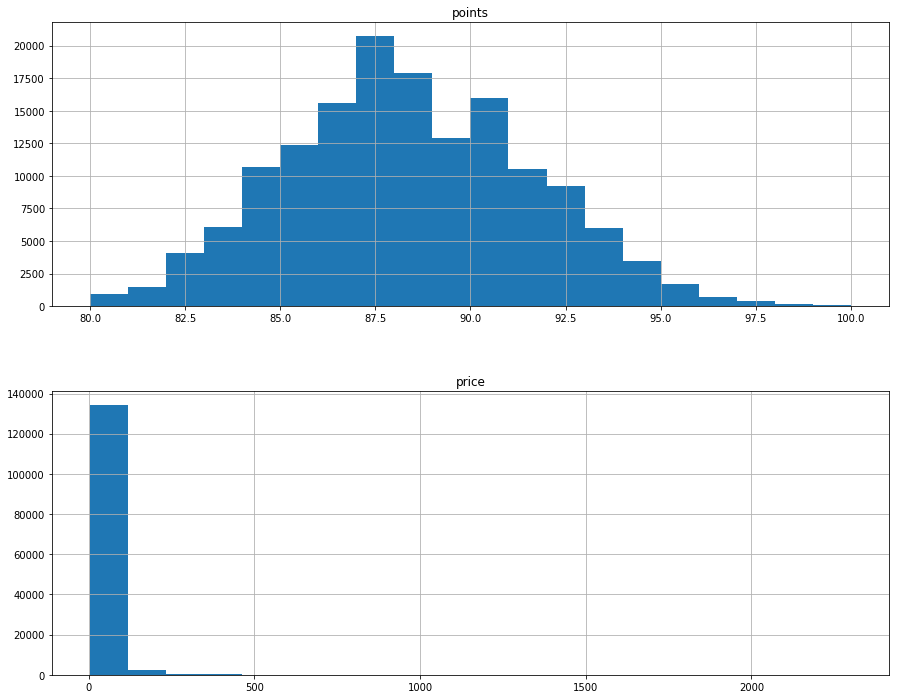

In [28]:
# points和price的直方图
wine_reviews.hist(layout=(2,1),bins=20,figsize=(15,12))

由直方图可以发现，points属性数据主要分布在85-92.5之间，price主要分布在0-300中间

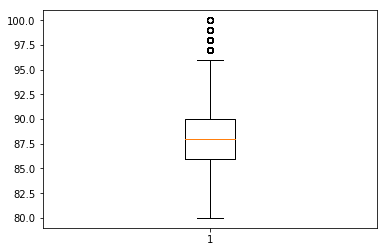

points 离群点范围:97.00--100.00


In [31]:
# 盒图
tmp=wine_reviews['points'].copy(deep=False)
# 删除缺失值部分
if any(tmp.isnull()):
    tmp.dropna(inplace=True)
p=plt.boxplot(x=tmp)
plt.show()
y=p['fliers'][0].get_ydata()
y.sort()
print("points 离群点范围:%.2f--%.2f"%(y[0],y[-1]))

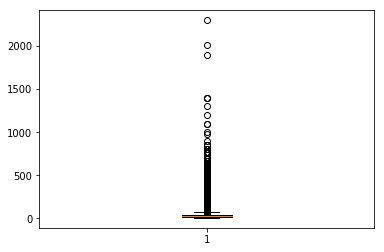

price离群点范围:77.00--2300.00


In [32]:
tmp=wine_reviews['price'].copy(deep=False)
# 删除缺失值部分,绘制price盒图
if any(tmp.isnull()):
    tmp.dropna(inplace=True)
p=plt.boxplot(x=tmp)
plt.show()
y=p['fliers'][0].get_ydata()
y.sort()
print("price离群点范围:%.2f--%.2f"%(y[0],y[-1]))

## 2.数据缺失值的处理

In [51]:
for i in wine_reviews.columns:
    print(i,"is null:")
    print(wine_reviews[wine_reviews[i].isnull().values==True][i])


country is null:
1133      NaN
1440      NaN
68226     NaN
113016    NaN
135696    NaN
Name: country, dtype: object
description is null:
Series([], Name: description, dtype: object)
designation is null:
36        NaN
37        NaN
38        NaN
48        NaN
49        NaN
51        NaN
54        NaN
61        NaN
64        NaN
71        NaN
73        NaN
78        NaN
87        NaN
90        NaN
96        NaN
97        NaN
100       NaN
102       NaN
106       NaN
107       NaN
108       NaN
117       NaN
125       NaN
130       NaN
131       NaN
133       NaN
140       NaN
143       NaN
145       NaN
147       NaN
         ... 
150849    NaN
150852    NaN
150853    NaN
150854    NaN
150855    NaN
150857    NaN
150858    NaN
150859    NaN
150865    NaN
150868    NaN
150869    NaN
150872    NaN
150874    NaN
150875    NaN
150879    NaN
150880    NaN
150882    NaN
150884    NaN
150886    NaN
150888    NaN
150891    NaN
150893    NaN
150895    NaN
150896    NaN
150898    NaN
150904    NaN

可以发现，country(5),designation(45735),province(5),region_1(25060),region_2(89977)等地点值缺失，推测由于某些葡萄酒产地没有具体化或者不清楚造成缺失，price 葡萄酒的价格这一数值属性存在13695个缺失值，可能是因为统计失误

### 2.1将缺失部分剔除

150k数据对designation处理后的分布：


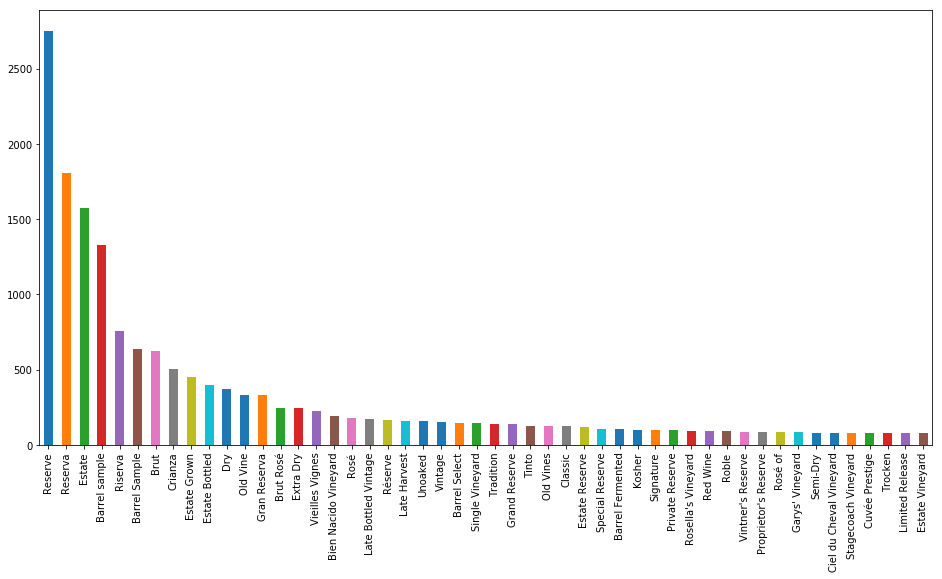

130k数据designation分布：


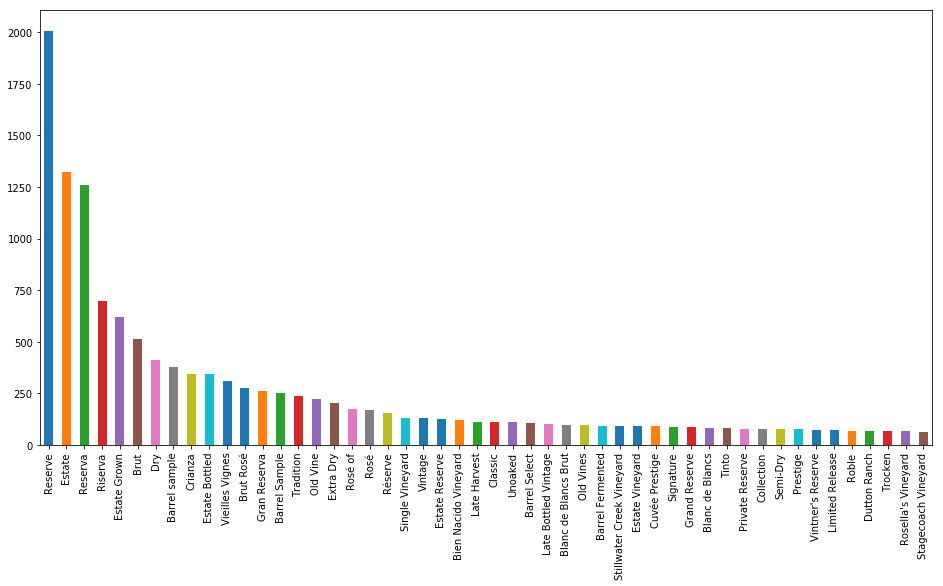

In [5]:
# 将缺失部分直接剔除
# 产地信息以designation为例,对前50的designation做可视化
df1=wine_reviews.copy()
df2=wine_process.copy()
s1=df1['designation'].dropna(how='any').value_counts()
print("150k数据对designation处理后的分布：")
s1[:50].plot(kind='bar',figsize=(16,8))
plt.show()
print("130k数据designation分布：")
s2=df2['designation'].value_counts()
s2[:50].plot(kind='bar',figsize=(16,8))
plt.show()

150k数据对price处理后的分布：


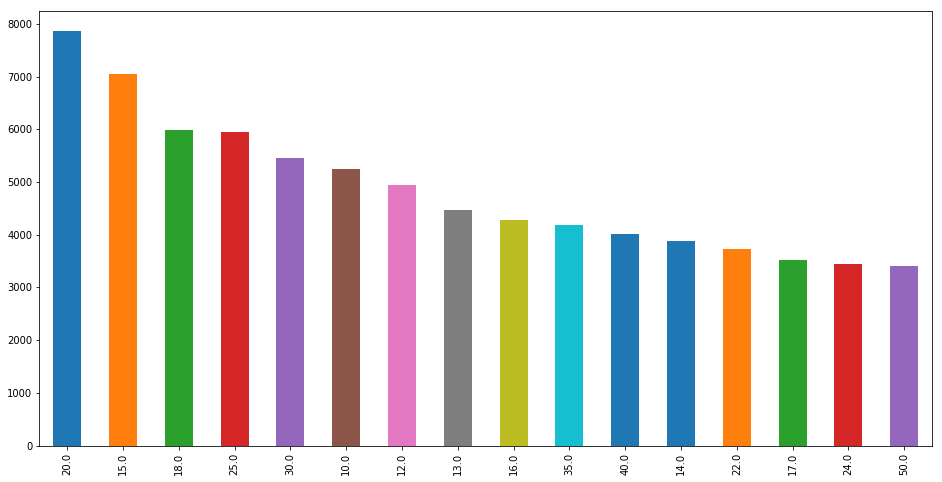

130k数据price分布：


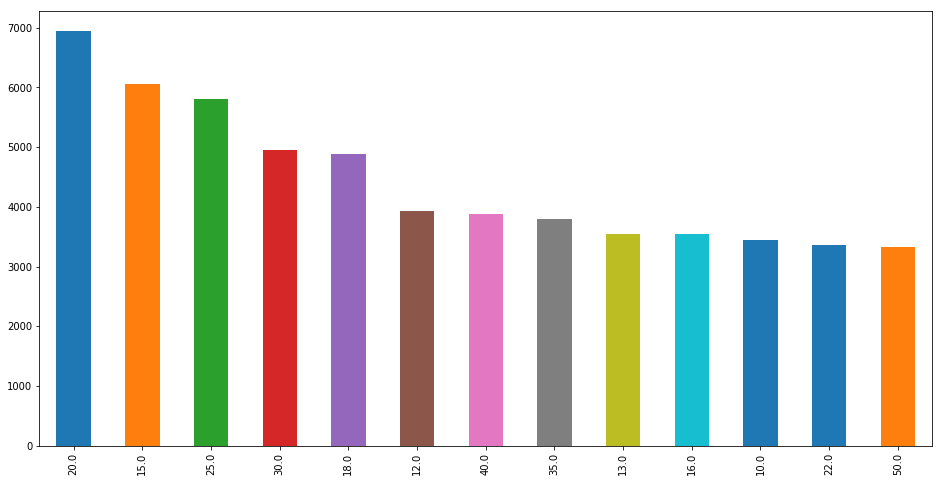

In [15]:
# 剔除price信息
s1=df1['price'].dropna(how='any').value_counts()
print("150k数据对price处理后的分布：")
s1[:50].plot(kind='bar',figsize=(16,8))
plt.show()
print("130k数据price分布：")
s2=df2['price'].value_counts()
s2[:50].plot(kind='bar',figsize=(16,8))
plt.show()

可以看到，剔除缺失值后的数据和130k的数据分布比较相似，但是频数略高，推测130k数据联合其他属性的缺失值剔除了更多数据

### 2.2 用最高频率值来填补缺失值

Reserve
150k数据对designation处理后的分布：


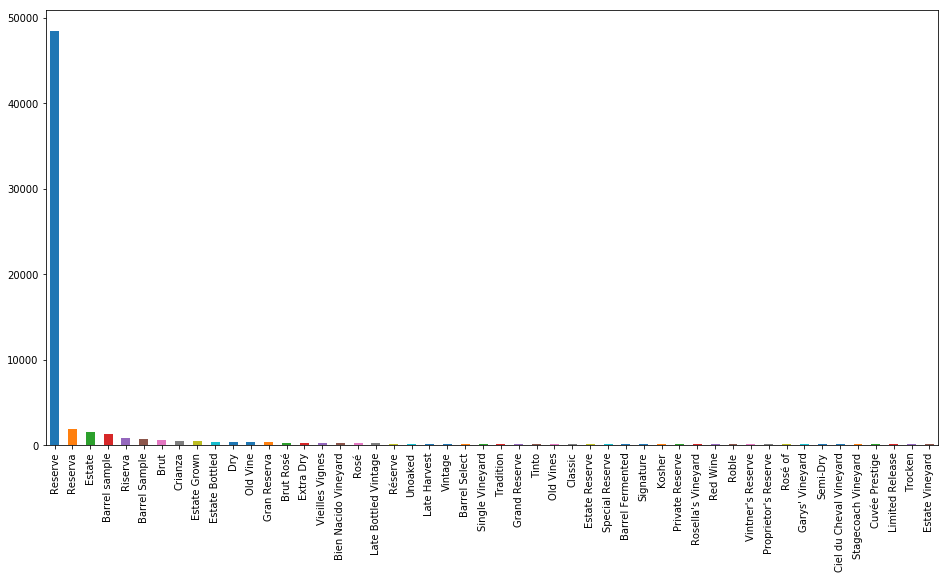

130k数据designation分布：


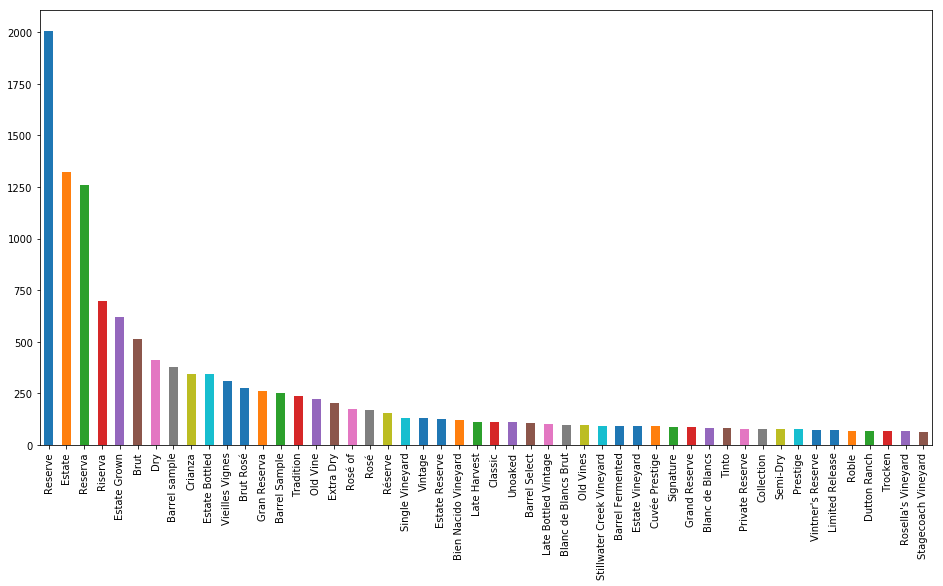

In [35]:
# 用最高频率值来填补缺失值
# 产地信息以designation为例,对前50的designation做可视化
fill=df1['designation'].value_counts().argmax()
s1=df1['designation'].fillna(fill).value_counts()
print("150k数据对designation处理后的分布：")
s1[:50].plot(kind='bar',figsize=(16,8))
plt.show()
print("130k数据designation分布：")
s2=df2['designation'].value_counts()
s2[:50].plot(kind='bar',figsize=(16,8))
plt.show()

由上图可知，填充频数最高的值（Reserve）以后，数据向该值倾斜，不合理


150k数据对price处理后的分布：


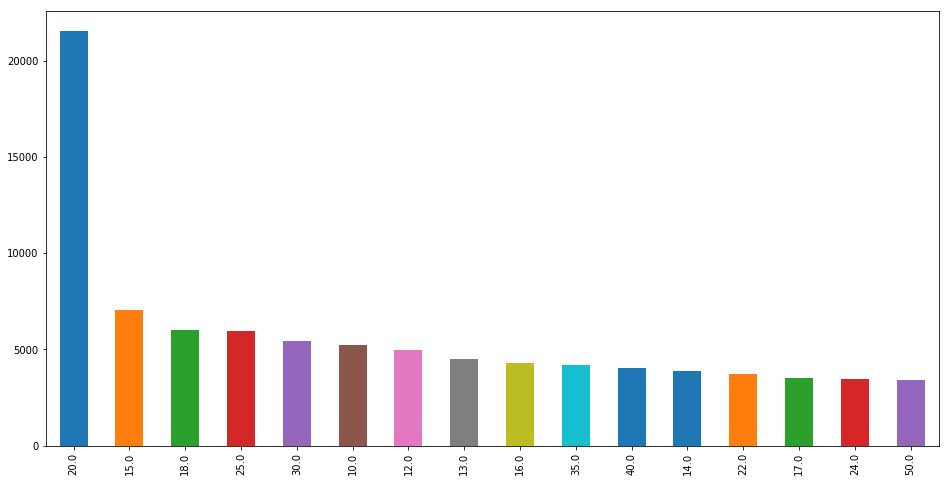

130k数据price分布：


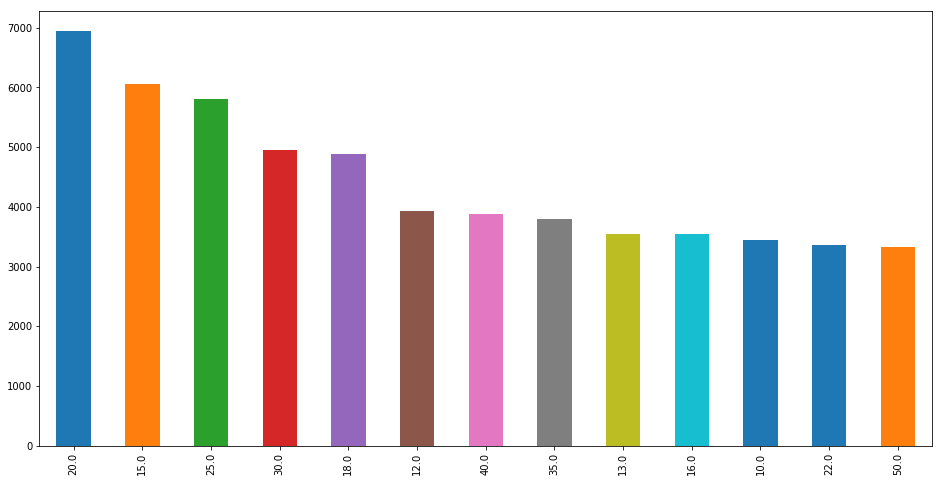

In [43]:
# 以price为例,对前50的price做可视化
fill=df1['price'].value_counts().argmax()
s1=df1['price'].fillna(fill).value_counts()
print("150k数据对price处理后的分布：")
s1[:50].plot(kind='bar',figsize=(16,8))
plt.show()
print("130k数据price分布：")
s2=df2['price'].value_counts()
s2[:50].plot(kind='bar',figsize=(16,8))
plt.show()


150k数据填充前的盒图：


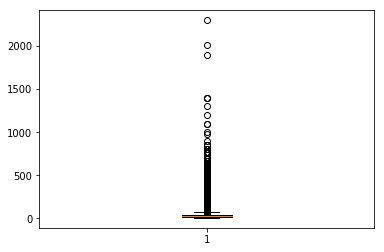

price离群点范围:77.00--2300.00
150k数据缺失值填充后的盒图：


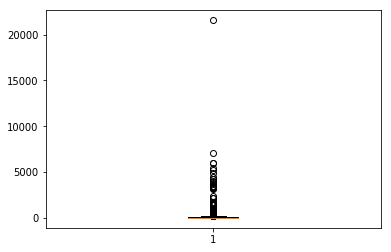

缺失值填充后的离群点范围：190.00--21555.00
130k数据price的盒图：


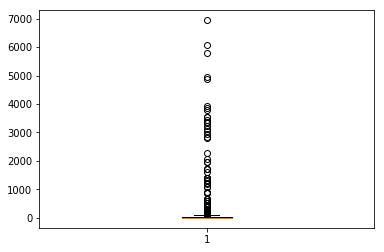

130k数据的离群点范围：114.00--6940.00


In [46]:
# 盒图对比
tmp=wine_reviews['price'].copy(deep=False)
# 删除缺失值部分,绘制price盒图
if any(tmp.isnull()):
    tmp.dropna(inplace=True)
p=plt.boxplot(x=tmp)
print("150k数据填充前的盒图：")
plt.show()
y=p['fliers'][0].get_ydata()
y.sort()
print("price离群点范围:%.2f--%.2f"%(y[0],y[-1]))
p=plt.boxplot(x=s1)
print("150k数据缺失值填充后的盒图：")
plt.show()
y=p['fliers'][0].get_ydata()
y.sort()
print("缺失值填充后的离群点范围：%.2f--%.2f"%(y[0],y[-1]))
p=plt.boxplot(x=s2)
print("130k数据price的盒图：")
plt.show()
y=p['fliers'][0].get_ydata()
y.sort()
print("130k数据的离群点范围：%.2f--%.2f"%(y[0],y[-1]))

使用price频数最高的值20对price填充之后，数据分布发生了极大的变化，price=20的数据由之前的大约7000个变为20000多个，离群点的范围也发生了改变这种方法不太合理

### 2.3通过属性的相关关系来填补缺失值

In [64]:
orrdf = wine_reviews.corr()
corrdf

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


通过计算相关系数发现points和price存在较强的相关性，因此通过point来对price的缺失值进行填充。采用多变量插补的方式使用IterativeImputer类，它将每个缺失值的特征建模为其他特征的函数，并使用该估计值进行估算。以迭代循环方式执行：在每个步骤中，将price指定为输出y，将points视为输入X。使用一个回归器来在已知y的样本上，对（Ｘ，ｙ）进行拟合。然后使用这个回归器来预测缺失的ｙ值。

150k数据对price处理后的分布：


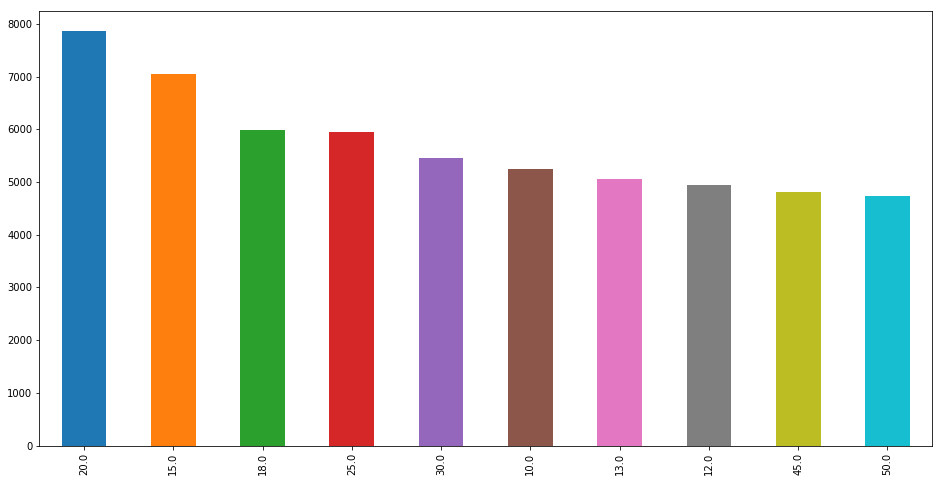

130k数据price分布：


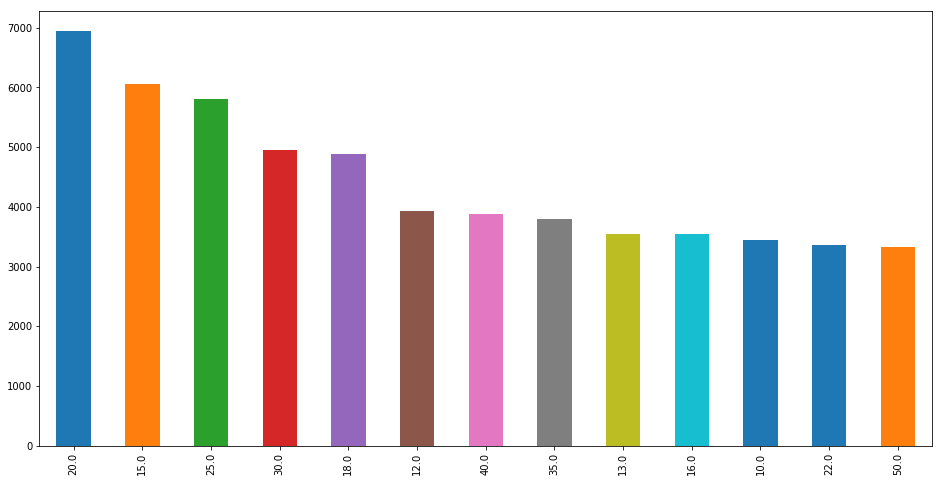

In [19]:
imp = IterativeImputer(max_iter=4)
s1=imp.fit_transform(df1[['points','price']])
s1=np.round(s1)
data_list = map(lambda x: x[0], s1[:,[1]])
s1=pd.Series(data_list).value_counts()
# 以price为例,对前50的price做可视化
print("150k数据对price处理后的分布：")
s1[:50].plot(kind='bar',figsize=(16,8))
plt.show()
print("130k数据price分布：")
s2=df2['price'].value_counts()
s2[:50].plot(kind='bar',figsize=(16,8))
plt.show()

通过相关属性进行回归预测填补的缺失值与130k数据分布比较相似，是较合理的一种方法

### 2.4 通过数据对象之间的相似性来填补缺失值

#### 采用随机森林来对缺失值进行拟合。

In [79]:
from  sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
def set_missing(df,estimate_list,miss_col):
    """df要处理的数据帧，estimate_list用来估计缺失值的字段列表,miss_col缺失字段名称;会直接在原来的数据帧上修改"""
    col_list=estimate_list
    col_list.extend(miss_col)  
    process_df = df[col_list]

    class_le= LabelEncoder()
    for i in col_list[:-1]:
        process_df.loc[:,i]=class_le.fit_transform(process_df.loc[:,i].values)
    # 分成已知该特征和未知该特征两部分
    
    known=process_df[process_df[miss_col].isnull().values==False].values
#     print(process_df[miss_col].notnull())
    known[:, -1]=class_le.fit_transform(known[:, -1])
    unknown = process_df[process_df[miss_col].isnull().values==True].values
    # X为特征属性值
    X = known[:, :-1]

    # y为结果标签值
    y = known[:, -1]
    # fit到RandomForestRegressor之中
    rfr = ensemble.RandomForestRegressor(random_state=1, n_estimators=200,max_depth=4,n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, :-1]).round(0).astype(int)
    predicted=class_le.inverse_transform(predicted)
    # 用得到的预测结果填补原缺失数据
#     print( df[df[miss_col].isnull().values==True][miss_col])
#     print(len(predicted))
    df[df[miss_col].isnull().values==True][miss_col] = predicted
    return df
 
s1=set_missing(df=df1,estimate_list=['points'],miss_col=['price'])['price']
s1=s1.value_counts()
print(s1[:100])

20.0     7860
15.0     7056
18.0     5988
25.0     5955
30.0     5449
10.0     5255
12.0     4950
13.0     4479
16.0     4273
35.0     4194
40.0     4018
14.0     3879
22.0     3723
17.0     3513
24.0     3443
50.0     3415
28.0     3352
19.0     3288
45.0     3243
11.0     3114
9.0      2350
32.0     2197
60.0     2179
23.0     1785
55.0     1785
38.0     1780
26.0     1766
8.0      1633
75.0     1510
36.0     1480
21.0     1454
65.0     1441
42.0     1434
27.0     1419
29.0     1389
48.0     1365
34.0     1084
70.0     1076
39.0      942
33.0      805
80.0      804
7.0       755
90.0      690
100.0     668
Name: price, dtype: int64


150k数据对price处理后的分布：


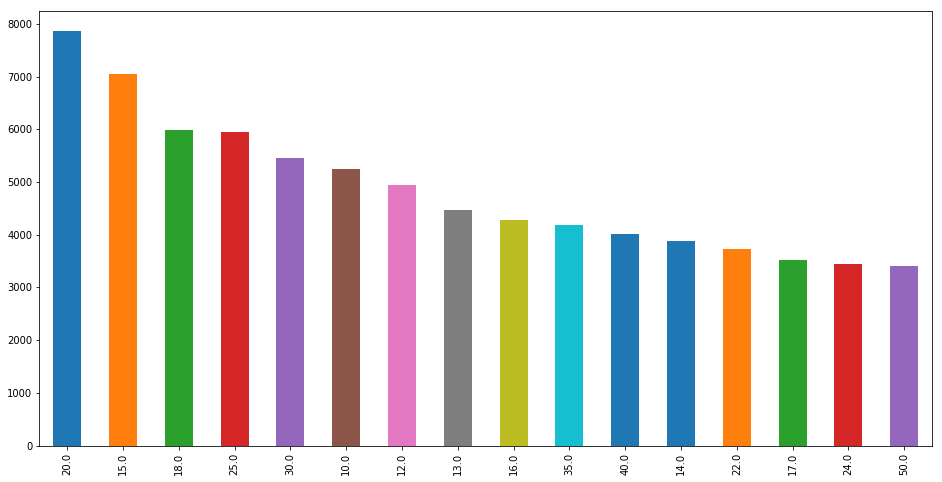

130k数据price分布：


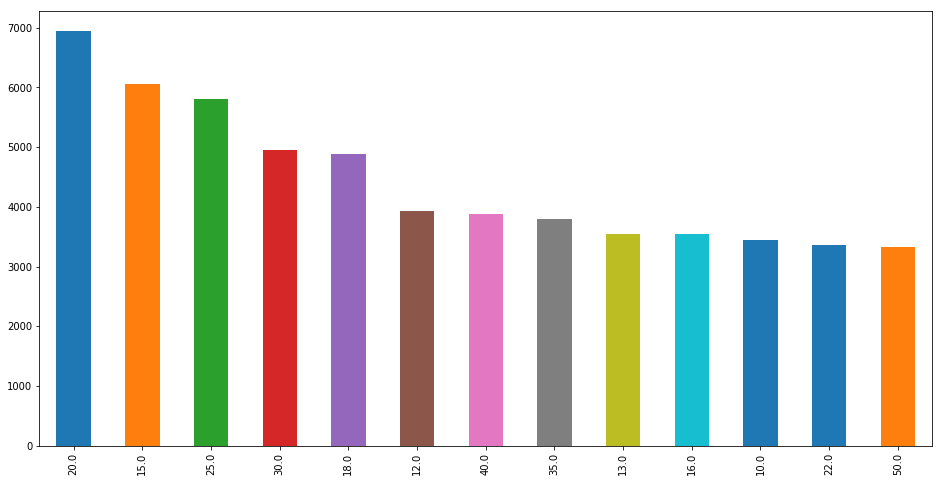

In [78]:
# 以price为例,对前50的price做可视化
print("150k数据对price处理后的分布：")
s1[:50].plot(kind='bar',figsize=(16,8))
plt.show()
print("130k数据price分布：")
s2=df2['price'].value_counts()
s2[:50].plot(kind='bar',figsize=(16,8))
plt.show()

经过对比，使用随机森林进行分类然后对缺失值赋值的方法和130k数据分布也比较相似。因此后两种方法对于本数据集更加合理